In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline

In [2]:
# Import extracted amazon reviews Dataset
reviews=pd.read_csv('Review.csv')
reviews

,Review
0,I see no reviews of this phone on Amazon so ...
1,I will not say 1000 words of review only jus...
2,Pros:- Phone is truly a flagship device.It h...
3,Not at all happy with any aspect.. Feels lik...
4,The media could not be loa...
5,I have been a one plus fan since its concept...
6,Battery backup very poooor
7,Bugs fixed by friend. Everything works fine ...
8,"This is a early review, will provide detaile..."
9,this is my first review about this phone so ...


In [6]:
# Text Preprocessing
reviews=[Review.strip() for Review in reviews.Review] # remove both the leading and the trailing characters
reviews=[Review for Review in reviews if Review] # removes empty strings, because they are considered in Python as False
reviews

['I see no reviews of this phone on Amazon so far. Is mine the First? Looks like not many were interested in this phone after all! :D As usual I end up purchasing not so popular things like I did in 2015 by purchasing Samsung Galaxy S5.I ordered my Oneplus 9RT from Oneplus Store app as soon as it went on sale because there was a small extra discount on old Oneplus phones. It looked like a good deal but when I checked the Amazon website, there were already card offers of about Rs.4000 off using SBI and a few other not so popular cards. I have only HDFC credit card which had no offers.But I still chose to purchase it from Oneplus store because I was getting Rs.500 off on OnePlus Band. I decided to try that too as I own Oneplus Buds Z (See! Getting into the Ecosystem). Another offer was 6 months free Spotify premium (not available to those who completed Spotify free trial or previously purchased Spotify premium as per their T&C. Do re-check if you are buying from there).Coming to the Holi

In [7]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'I see no reviews of this phone on Amazon so far. Is mine the First? Looks like not many were interested in this phone after all! :D As usual I end up purchasing not so popular things like I did in 2015 by purchasing Samsung Galaxy S5.I ordered my Oneplus 9RT from Oneplus Store app as soon as it went on sale because there was a small extra discount on old Oneplus phones. It looked like a good deal but when I checked the Amazon website, there were already card offers of about Rs.4000 off using SBI and a few other not so popular cards. I have only HDFC credit card which had no offers.But I still chose to purchase it from Oneplus store because I was getting Rs.500 off on OnePlus Band. I decided to try that too as I own Oneplus Buds Z (See! Getting into the Ecosystem). Another offer was 6 months free Spotify premium (not available to those who completed Spotify free trial or previously purchased Spotify premium as per their T&C. Do re-check if you are buying from there).Coming to the Holis

In [8]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I see no reviews of this phone on Amazon so far Is mine the First Looks like not many were interested in this phone after all D As usual I end up purchasing not so popular things like I did in 2015 by purchasing Samsung Galaxy S5I ordered my Oneplus 9RT from Oneplus Store app as soon as it went on sale because there was a small extra discount on old Oneplus phones It looked like a good deal but when I checked the Amazon website there were already card offers of about Rs4000 off using SBI and a few other not so popular cards I have only HDFC credit card which had no offersBut I still chose to purchase it from Oneplus store because I was getting Rs500 off on OnePlus Band I decided to try that too as I own Oneplus Buds Z See Getting into the Ecosystem Another offer was 6 months free Spotify premium not available to those who completed Spotify free trial or previously purchased Spotify premium as per their TC Do recheck if you are buying from thereComing to the Holistic overview of the Ph

In [9]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens)

['I', 'see', 'no', 'reviews', 'of', 'this', 'phone', 'on', 'Amazon', 'so', 'far', 'Is', 'mine', 'the', 'First', 'Looks', 'like', 'not', 'many', 'were', 'interested', 'in', 'this', 'phone', 'after', 'all', 'D', 'As', 'usual', 'I', 'end', 'up', 'purchasing', 'not', 'so', 'popular', 'things', 'like', 'I', 'did', 'in', '2015', 'by', 'purchasing', 'Samsung', 'Galaxy', 'S5I', 'ordered', 'my', 'Oneplus', '9RT', 'from', 'Oneplus', 'Store', 'app', 'as', 'soon', 'as', 'it', 'went', 'on', 'sale', 'because', 'there', 'was', 'a', 'small', 'extra', 'discount', 'on', 'old', 'Oneplus', 'phones', 'It', 'looked', 'like', 'a', 'good', 'deal', 'but', 'when', 'I', 'checked', 'the', 'Amazon', 'website', 'there', 'were', 'already', 'card', 'offers', 'of', 'about', 'Rs4000', 'off', 'using', 'SBI', 'and', 'a', 'few', 'other', 'not', 'so', 'popular', 'cards', 'I', 'have', 'only', 'HDFC', 'credit', 'card', 'which', 'had', 'no', 'offersBut', 'I', 'still', 'chose', 'to', 'purchase', 'it', 'from', 'Oneplus', 'store

In [11]:
len(text_tokens)

3509

In [12]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['see', 'reviews', 'phone', 'Amazon', 'far', 'Is', 'mine', 'First', 'Looks', 'like', 'many', 'interested', 'phone', 'D', 'As', 'usual', 'end', 'purchasing', 'popular', 'things', 'like', '2015', 'purchasing', 'Samsung', 'Galaxy', 'S5I', 'ordered', 'Oneplus', '9RT', 'Oneplus', 'Store', 'app', 'soon', 'went', 'sale', 'small', 'extra', 'discount', 'old', 'Oneplus', 'phones', 'looked', 'like', 'good', 'deal', 'checked', 'Amazon', 'website', 'already', 'card', 'offers', 'Rs4000', 'using', 'SBI', 'popular', 'cards', 'HDFC', 'credit', 'card', 'offersBut', 'still', 'chose', 'purchase', 'Oneplus', 'store', 'getting', 'Rs500', 'OnePlus', 'Band', 'decided', 'try', 'Oneplus', 'Buds', 'Z', 'See', 'Getting', 'Ecosystem', 'Another', 'offer', '6', 'months', 'free', 'Spotify', 'premium', 'available', 'completed', 'Spotify', 'free', 'trial', 'previously', 'purchased', 'Spotify', 'premium', 'per', 'TC', 'Do', 'recheck', 'buying', 'thereComing', 'Holistic', 'overview', 'Phone', 'LOVE', 'IT', 'BECAUSE', 'OF

In [13]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['see', 'reviews', 'phone', 'amazon', 'far', 'is', 'mine', 'first', 'looks', 'like', 'many', 'interested', 'phone', 'd', 'as', 'usual', 'end', 'purchasing', 'popular', 'things', 'like', '2015', 'purchasing', 'samsung', 'galaxy', 's5i', 'ordered', 'oneplus', '9rt', 'oneplus', 'store', 'app', 'soon', 'went', 'sale', 'small', 'extra', 'discount', 'old', 'oneplus', 'phones', 'looked', 'like', 'good', 'deal', 'checked', 'amazon', 'website', 'already', 'card', 'offers', 'rs4000', 'using', 'sbi', 'popular', 'cards', 'hdfc', 'credit', 'card', 'offersbut', 'still', 'chose', 'purchase', 'oneplus', 'store', 'getting', 'rs500', 'oneplus', 'band', 'decided', 'try', 'oneplus', 'buds', 'z', 'see', 'getting', 'ecosystem', 'another', 'offer', '6', 'months', 'free', 'spotify', 'premium', 'available', 'completed', 'spotify', 'free', 'trial', 'previously', 'purchased', 'spotify', 'premium', 'per', 'tc', 'do', 'recheck', 'buying', 'therecoming', 'holistic', 'overview', 'phone', 'love', 'it', 'because', 'of

In [14]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['see', 'review', 'phone', 'amazon', 'far', 'is', 'mine', 'first', 'look', 'like', 'mani', 'interest', 'phone', 'd', 'as', 'usual', 'end', 'purchas', 'popular', 'thing', 'like', '2015', 'purchas', 'samsung', 'galaxi', 's5i', 'order', 'oneplu', '9rt', 'oneplu', 'store', 'app', 'soon', 'went', 'sale', 'small', 'extra', 'discount', 'old', 'oneplu', 'phone', 'look', 'like', 'good', 'deal', 'check', 'amazon', 'websit', 'alreadi', 'card', 'offer', 'rs4000', 'use', 'sbi', 'popular', 'card', 'hdfc', 'credit', 'card', 'offersbut', 'still', 'chose', 'purchas', 'oneplu', 'store', 'get', 'rs500', 'oneplu', 'band', 'decid', 'tri', 'oneplu', 'bud', 'z', 'see', 'get', 'ecosystem', 'anoth', 'offer', '6', 'month', 'free', 'spotifi', 'premium', 'avail', 'complet', 'spotifi', 'free', 'trial', 'previous', 'purchas', 'spotifi', 'premium', 'per', 'tc', 'do', 'recheck', 'buy', 'therecom', 'holist', 'overview', 'phone', 'love', 'it', 'becaus', 'of', 'it', 'aesthet', 'and', 'overal', 'packag', 'and', 'come', '

In [15]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

see reviews phone amazon far is mine first looks like many interested phone d as usual end purchasing popular things like 2015 purchasing samsung galaxy s5i ordered oneplus 9rt oneplus store app soon went sale small extra discount old oneplus phones looked like good deal checked amazon website already card offers rs4000 using sbi popular cards hdfc credit card offersbut still chose purchase oneplus store getting rs500 oneplus band decided try oneplus buds z see getting ecosystem another offer 6 months free spotify premium available completed spotify free trial previously purchased spotify premium per tc do recheck buying therecoming holistic overview phone love it because of its aesthetics and overall package and coming budget phones good upgrade ticks many boxes if downsizing popular flagship yesteryears ’ think would make much differencethis review going bit long may ’ try keep short crispaestheticshacker black colour superb love combined aluminium frame gives truly premium look remi

In [16]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['see', 'review', 'phone', 'amazon', 'far', 'be', 'mine', 'first', 'look', 'like', 'many', 'interested', 'phone', 'd', 'as', 'usual', 'end', 'purchase', 'popular', 'thing', 'like', '2015', 'purchase', 'samsung', 'galaxy', 's5i', 'ordered', 'oneplus', '9rt', 'oneplus', 'store', 'app', 'soon', 'go', 'sale', 'small', 'extra', 'discount', 'old', 'oneplus', 'phone', 'look', 'like', 'good', 'deal', 'check', 'amazon', 'website', 'already', 'card', 'offer', 'rs4000', 'use', 'sbi', 'popular', 'card', 'hdfc', 'credit', 'card', 'offersbut', 'still', 'choose', 'purchase', 'oneplus', 'store', 'get', 'rs500', 'oneplus', 'band', 'decide', 'try', 'oneplus', 'bud', 'z', 'see', 'get', 'ecosystem', 'another', 'offer', '6', 'month', 'free', 'spotify', 'premium', 'available', 'complete', 'spotify', 'free', 'trial', 'previously', 'purchase', 'spotify', 'premium', 'per', 'tc', 'do', 'recheck', 'buy', 'therecome', 'holistic', 'overview', 'phone', 'love', 'it', 'because', 'of', 'its', 'aesthetic', 'and', 'over

In [17]:
clean_reviews=' '.join(lemmas)
clean_reviews

"see review phone amazon far be mine first look like many interested phone d as usual end purchase popular thing like 2015 purchase samsung galaxy s5i ordered oneplus 9rt oneplus store app soon go sale small extra discount old oneplus phone look like good deal check amazon website already card offer rs4000 use sbi popular card hdfc credit card offersbut still choose purchase oneplus store get rs500 oneplus band decide try oneplus bud z see get ecosystem another offer 6 month free spotify premium available complete spotify free trial previously purchase spotify premium per tc do recheck buy therecome holistic overview phone love it because of its aesthetic and overall package and come budget phone good upgrade tick many box if downsize popular flagship yesteryear ' think would make much differencethis review go bit long may ' try keep short crispaestheticshacker black colour superb love combine aluminium frame give truly premium look remind day purchase oneplus 3 t sake gunmetal colour 

In [18]:
# Feature Extaction
# 1. Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [19]:
print(cv.vocabulary_)

{'see': 751, 'review': 725, 'phone': 634, 'amazon': 104, 'far': 344, 'be': 150, 'mine': 538, 'first': 360, 'look': 504, 'like': 494, 'many': 518, 'interested': 457, 'as': 121, 'usual': 889, 'end': 315, 'purchase': 685, 'popular': 654, 'thing': 840, '2015': 20, 'samsung': 743, 'galaxy': 374, 's5i': 737, 'ordered': 609, 'oneplus': 598, '9rt': 77, 'store': 813, 'app': 115, 'soon': 793, 'go': 388, 'sale': 740, 'small': 783, 'extra': 336, 'discount': 295, 'old': 594, 'good': 389, 'deal': 269, 'check': 210, 'website': 910, 'already': 97, 'card': 198, 'offer': 586, 'rs4000': 730, 'use': 886, 'sbi': 747, 'hdfc': 417, 'credit': 256, 'offersbut': 587, 'still': 810, 'choose': 213, 'get': 384, 'rs500': 731, 'band': 145, 'decide': 270, 'try': 868, 'bud': 179, 'ecosystem': 312, 'another': 112, 'month': 552, 'free': 367, 'spotify': 802, 'premium': 662, 'available': 132, 'complete': 235, 'trial': 865, 'previously': 666, 'per': 631, 'tc': 830, 'do': 299, 'recheck': 708, 'buy': 185, 'therecome': 837, 'h

In [22]:
print(cv.get_feature_names()[150:300])

['be', 'beard', 'because', 'become', 'begin', 'behind', 'believe', 'benefit', 'best9', 'bgmi', 'big', 'bit', 'bixby', 'black', 'blessing', 'bliss', 'bloat', 'blogge', 'bluetooth', 'boat', 'body', 'bore', 'box', 'box3', 'boxy', 'brand', 'brightness', 'bring', 'brush', 'bud', 'budget', 'bug', 'buildersbuttonsi', 'but', 'button', 'buy', 'buydont', 'call', 'cam', 'camera', 'cameracon', 'cameradisplayoh', 'cameraois', 'cameras', 'can', 'capability', 'capable', 'capture', 'card', 'carry', 'case', 'casual', 'catch', 'chance', 'change', 'charge', 'charger', 'chargingdischarging65w', 'charginggaming', 'cheapera', 'check', 'chipset', 'choice', 'choose', 'clean', 'click', 'close', 'cluttered', 'clutteredhasselblad', 'codec', 'collaboration', 'color', 'coloro', 'colour', 'combine', 'come', 'come9', 'comfortable', 'company', 'compare', 'comparealternate', 'comparison', 'compete', 'competitor', 'complaint', 'complete', 'completely', 'conception', 'conclude', 'conclusionin', 'condition', 'conducive',

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
print(reviewscv.toarray().shape)

(2003, 940)


In [25]:
# 2. CountVectorizer with N-grams (Bigrams & Trigrams)
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [26]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['11', '12', '120hz', '9rt', 'also', 'android', 'app', 'back', 'battery', 'big', 'bit', 'but', 'camera', 'card', 'charge', 'colour', 'come', 'cool', 'day', 'device', 'display', 'do', 'even', 'experience', 'feel', 'fine', 'fix', 'flagship', 'frame', 'game', 'gaming', 'get', 'give', 'go', 'good', 'got', 'gpu', 'great', 'hand', 'heat', 'high', 'keep', 'know', 'last', 'level', 'like', 'look', 'love', 'low', 'make', 'many', 'may', 'mean', 'mobile', 'month', 'much', 'need', 'not', 'one', 'oneplus', 'os', 'overall', 'phone', 'picture', 'play', 'plus', 'premium', 'previous', 'price', 'pro', 'provide', 'purchase', 'rate', 'refresh', 'review', 'samsung', 'say', 'screen', 'see', 'sensor', 'set', 'smooth', 'software', 'spotify', 'start', 'still', 'temperature', 'thing', 'this', 'time', 'update', 'usage', 'use', 'volume', 'well', 'wish', 'word', 'work', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
# 3. TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [28]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['11', '12', '120hz', '15', '16mp', '20', '25', '35', '40k', '43000', '4500mah', '50', '50mp', '60', '60hz', '888', '9rt', 'able', 'accurate', 'add', 'after', 'also', 'amazon', 'and', 'android', 'app', 'around', 'as', 'ask', 'atmos', 'average', 'awesome', 'back', 'bad', 'band', 'base', 'battery', 'be', 'become', 'begin', 'believe', 'bgmi', 'big', 'bit', 'black', 'bluetooth', 'body', 'box', 'brand', 'brightness', 'budget', 'bug', 'but', 'button', 'buy', 'call', 'cam', 'camera', 'capture', 'card', 'case', 'change', 'charge', 'charger', 'close', 'color', 'colour', 'come', 'compare', 'completely', 'conclude', 'cool', 'cover', 'credit', 'cross', 'day', 'deal', 'decide', 'definitely', 'degree', 'design', 'detail', 'device', 'difference', 'display', 'do', 'dolby', 'drain', 'drop', 'effect', 'end', 'even', 'excellent', 'expect', 'expectation', 'experience', 'extra', 'extremely', 'f15', 'far', 'fast', 'feature', 'feel', 'fhd', 'find', 'fine', 'first', 'fix', 'flagship', 'for', 'frame', 'framera

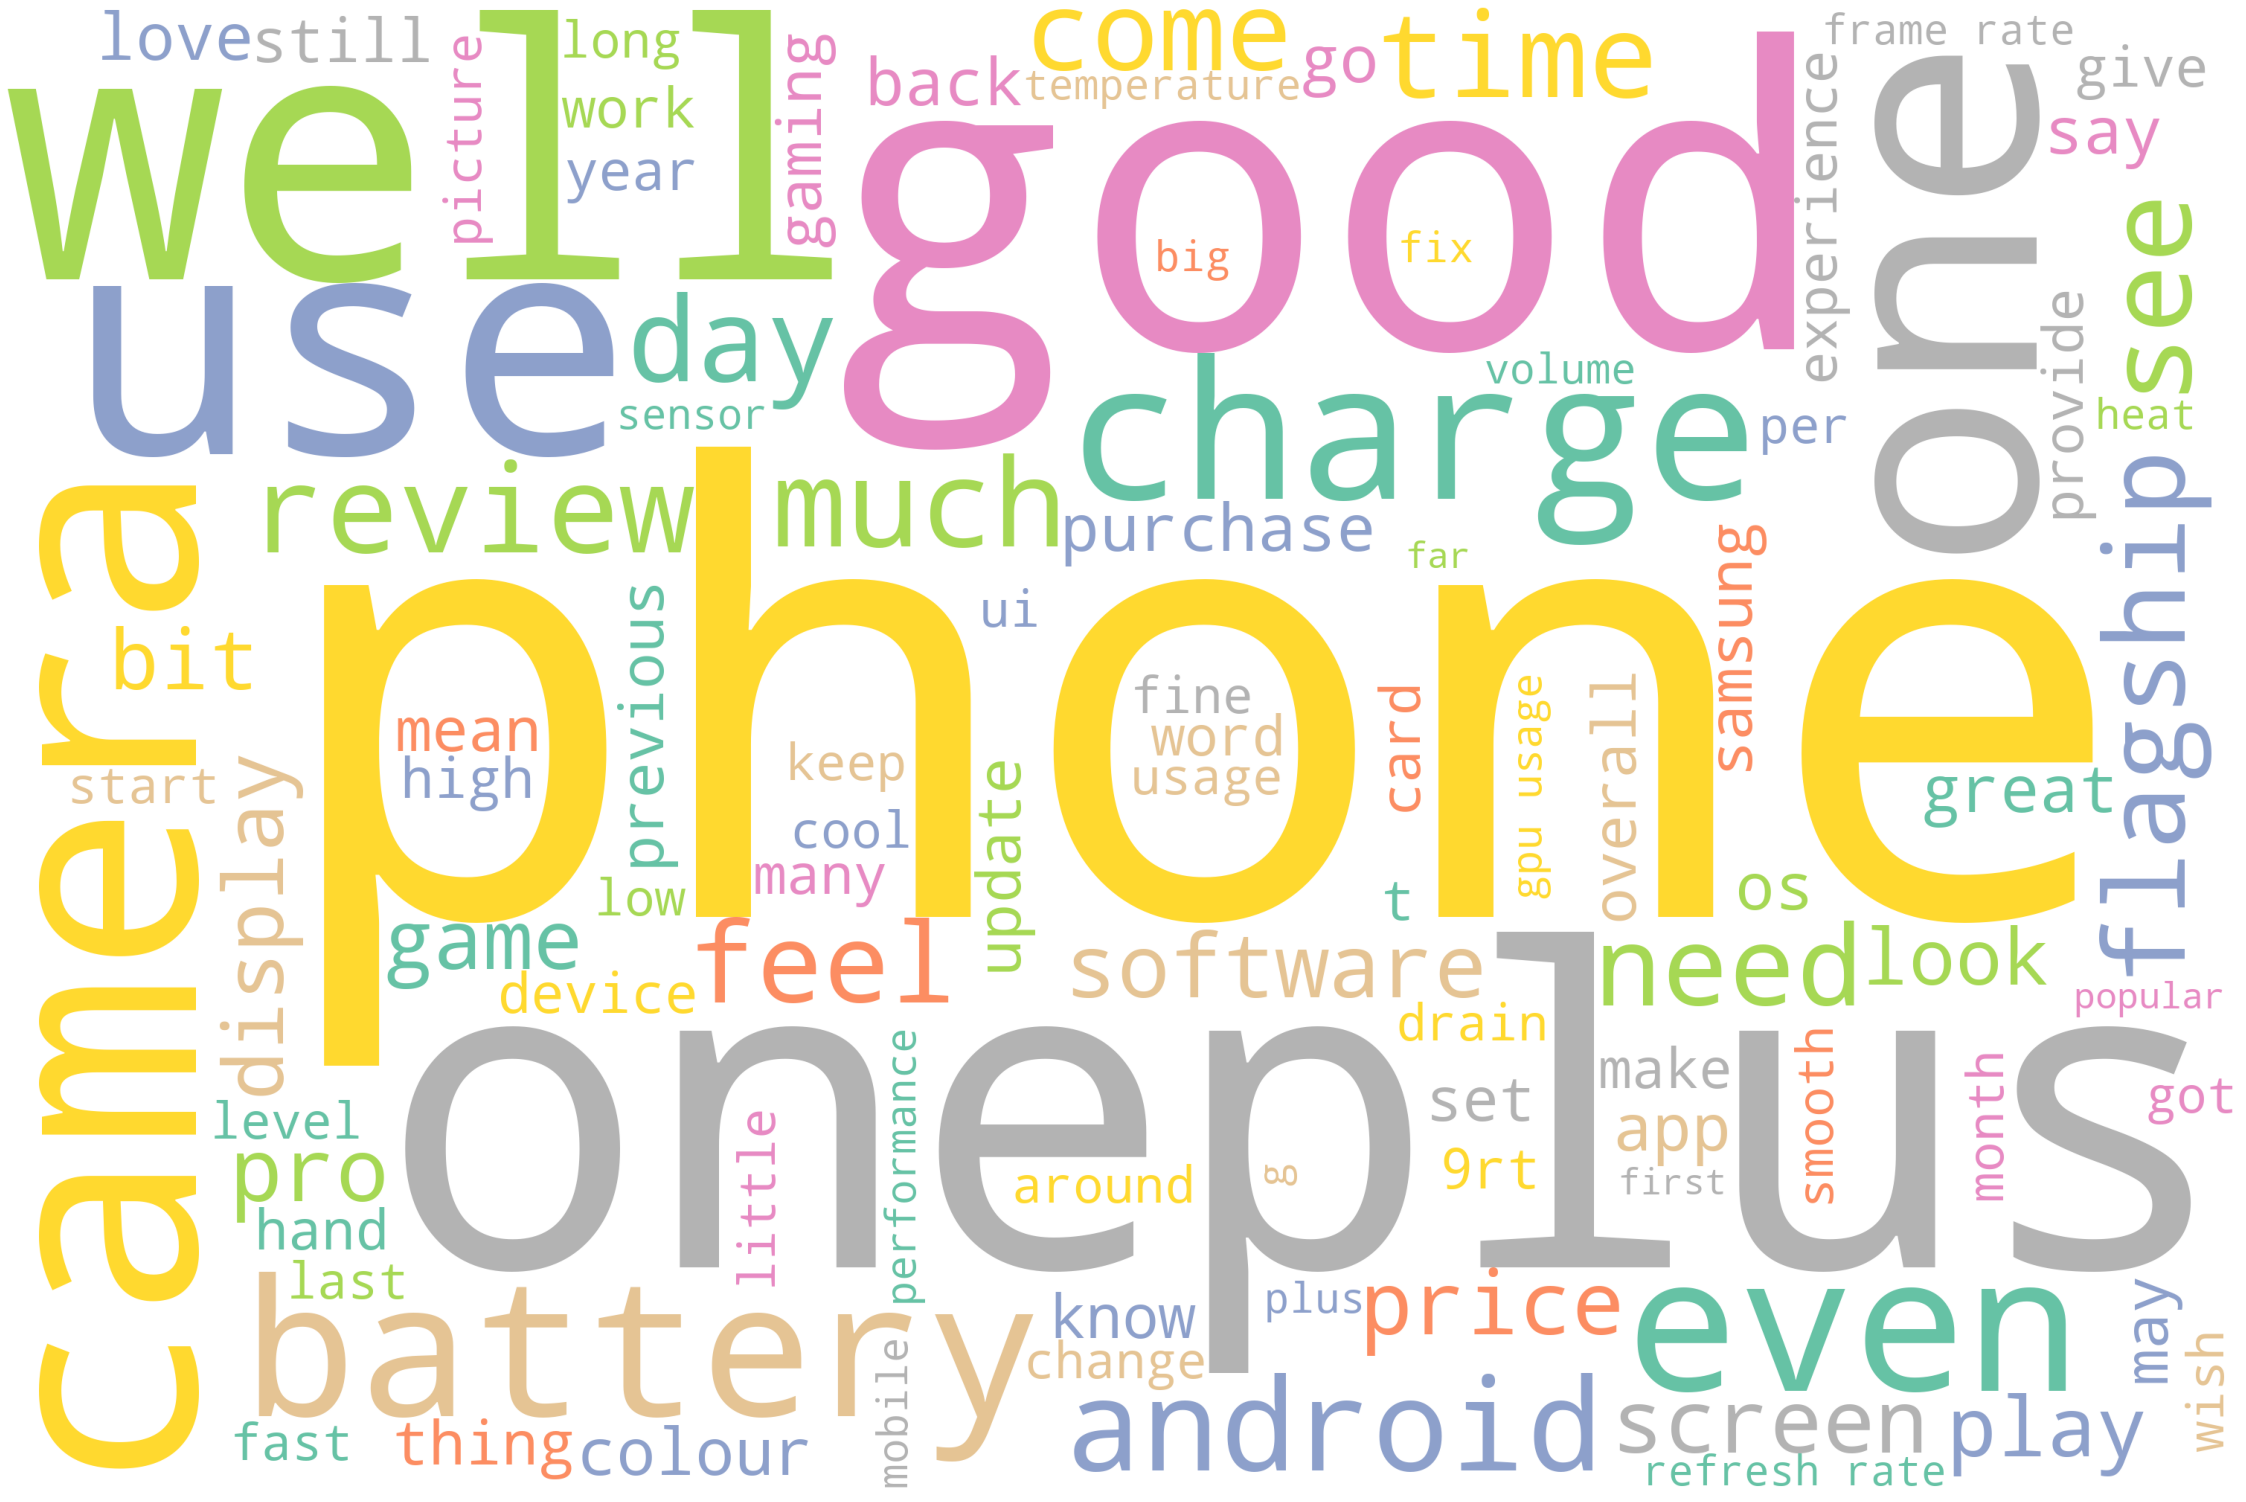

In [31]:
# Generate Word Cloud
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

In [32]:
# Named Entity Recognition (NER)
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [33]:
for token in doc_block[100:200]:
    print(token,token.pos_)

overview NOUN
phone NOUN
love NOUN
it PRON
because SCONJ
of ADP
its PRON
aesthetic ADJ
and CCONJ
overall ADJ
package NOUN
and CCONJ
come VERB
budget NOUN
phone NOUN
good ADJ
upgrade NOUN
tick VERB
many ADJ
box NOUN
if SCONJ
downsize VERB
popular ADJ
flagship NOUN
yesteryear NOUN
' PUNCT
think NOUN
would AUX
make VERB
much ADJ
differencethis NOUN
review NOUN
go VERB
bit NOUN
long ADV
may AUX
' PUNCT
try VERB
keep VERB
short ADJ
crispaestheticshacker NOUN
black ADJ
colour NOUN
superb NOUN
love NOUN
combine VERB
aluminium NOUN
frame NOUN
give VERB
truly ADV
premium NOUN
look NOUN
remind ADJ
day NOUN
purchase NOUN
oneplus NOUN
3 NUM
t NOUN
sake NOUN
gunmetal ADJ
colour NOUN
wish NOUN
bring VERB
colour NOUN
backno NOUN
matter VERB
good ADJ
design NOUN
people NOUN
like ADP
use NOUN
case NOUN
case NOUN
good ADJ
no DET
complaint NOUN
would AUX
say VERB
need VERB
keep VERB
clean ADJ
phone NOUN
week NOUN
significant ADJ
chance NOUN
dust NOUN
damage NOUN
phoneit ADV
slim ADJ
tall ADJ
phone NOUN
w

In [34]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['say', 'need', 'keep', 'phone', 'week', 'chance', 'dust', 'damage', 'phone', 'say', 'compare', 'phone', 'shoulder', 'body', 'write', 'youtube', 'review', 'mention', 'slider', 'button', 'bit', 'phone', 'fine', 'job', 'fine', 'button', 'feedback', 'charge', 'day', 'plug', 'phone', 'charge', 'leave', 'go', 'teeth', 'face', 'take', 'min', 'come', 'charge', '743am', 'feel', 'gooddddd', 'unplug', '754am', 'mention', 'connect', 'bluetooth', 'device', 'see', 'battery', 'drain', 'bit', 'offset', '65w', 'charge', 'work', 'meif', 'use', 'day', 'issuecamerarear', 'cam', 'add', 'sample', 'image', 'say', 'camera', 'photography', 'reel', 'guess', 'expect', 'flagship', 'phone', 'meet', 'expectation', 'price', 'lighting', 'condition', 'shot', 'zoom', 'see', 'noise', 'photosmacro', 'camera', 'work', 'catch', 'need', 'adjust', 'exposure', 'base', 'need', 'capture', 'photo', 'night', 'mode', 'picture', 'capture', 'night', 'look', 'feel']


In [35]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,50
1,oneplus,19
2,use,17
3,camera,14
4,get,13
5,charge,13
6,battery,13
7,review,11
8,day,10
9,time,10


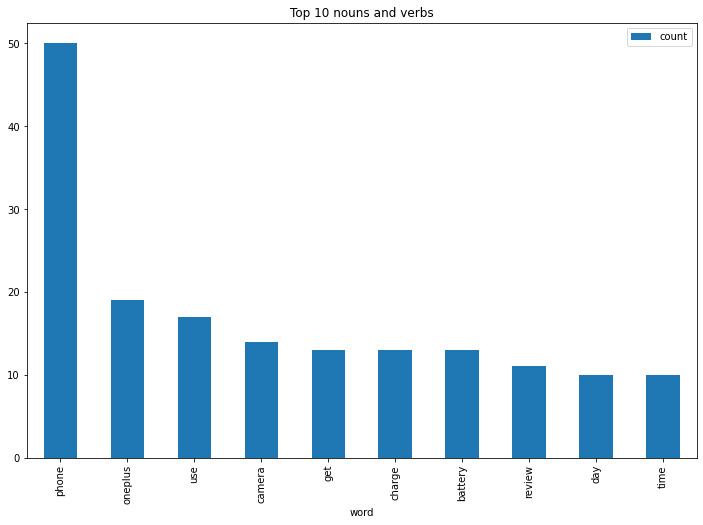

In [36]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

In [37]:
# Emotion Mining - Sentiment Analysis
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['I see no reviews of this phone on Amazon so far.',
 'Is mine the First?',
 'Looks like not many were interested in this phone after all!',
 ':D As usual I end up purchasing not so popular things like I did in 2015 by purchasing Samsung Galaxy S5.I ordered my Oneplus 9RT from Oneplus Store app as soon as it went on sale because there was a small extra discount on old Oneplus phones.',
 'It looked like a good deal but when I checked the Amazon website, there were already card offers of about Rs.4000 off using SBI and a few other not so popular cards.',
 'I have only HDFC credit card which had no offers.But I still chose to purchase it from Oneplus store because I was getting Rs.500 off on OnePlus Band.',
 'I decided to try that too as I own Oneplus Buds Z (See!',
 'Getting into the Ecosystem).',
 'Another offer was 6 months free Spotify premium (not available to those who completed Spotify free trial or previously purchased Spotify premium as per their T&C.',
 'Do re-check if you are b

In [38]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I see no reviews of this phone on Amazon so far.
1,Is mine the First?
2,Looks like not many were interested in this ph...
3,:D As usual I end up purchasing not so popular...
4,It looked like a good deal but when I checked ...
...,...
179,spotify premium 6 months ad free2.
180,power charger of 65 watts (will get inside box)3.
181,3 months extra coverage of warranty in total i...
182,phone screen is toughened with some protector ...


In [40]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [41]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [42]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [43]:
# manual testing
calculate_sentiment(text='good service')

3

In [44]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     -1
1      0
2      4
3      5
4      8
      ..
179    0
180    0
181    0
182    0
183    3
Name: sentiment_value, Length: 184, dtype: int64

In [45]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      11
1       4
2      11
3      47
4      32
       ..
179     6
180     9
181    14
182     9
183    69
Name: word_count, Length: 184, dtype: int64

In [46]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
145,"so, no information on drop resistance.5.only 4...",-4,42
101,"After watching this i really got disappointed,...",-3,16
169,no lag no heat issue6.,-3,5
104,Even after spending huge amount of money the s...,-2,18
82,"Sure, there are customizations but I’ve been u...",-2,18
...,...,...,...
96,I will not say 1000 words of review only just ...,7,36
4,It looked like a good deal but when I checked ...,8,32
167,camera great at par excellence dont see youtub...,9,19
98,Feels like using medium range phone..Camera 2/...,9,80


In [47]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    184.000000
mean       1.456522
std        2.408605
min       -4.000000
25%        0.000000
50%        0.000000
75%        3.000000
max        9.000000
Name: sentiment_value, dtype: float64

In [48]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,I see no reviews of this phone on Amazon so far.,-1,11
1,Is mine the First?,0,4
5,I have only HDFC credit card which had no offe...,-1,28
6,I decided to try that too as I own Oneplus Bud...,0,13
7,Getting into the Ecosystem).,0,4
...,...,...,...
176,outside body is so attractivecons1.,0,5
179,spotify premium 6 months ad free2.,0,6
180,power charger of 65 watts (will get inside box)3.,0,9
181,3 months extra coverage of warranty in total i...,0,14


In [49]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,Looks like not many were interested in this ph...,4,11
3,:D As usual I end up purchasing not so popular...,5,47
4,It looked like a good deal but when I checked ...,8,32
8,Another offer was 6 months free Spotify premiu...,2,26
9,Do re-check if you are buying from there).Comi...,3,25
...,...,...,...
167,camera great at par excellence dont see youtub...,9,19
175,blessing for gaming and graphics12.,3,5
177,android 12 should be with it.but due to some b...,5,22
178,size is little big so not good for small hands...,4,19


In [50]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I see no reviews of this phone on Amazon so far.,-1,11,0
1,Is mine the First?,0,4,1
2,Looks like not many were interested in this ph...,4,11,2
3,:D As usual I end up purchasing not so popular...,5,47,3
4,It looked like a good deal but when I checked ...,8,32,4
...,...,...,...,...
179,spotify premium 6 months ad free2.,0,6,179
180,power charger of 65 watts (will get inside box)3.,0,9,180
181,3 months extra coverage of warranty in total i...,0,14,181
182,phone screen is toughened with some protector ...,0,9,182


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

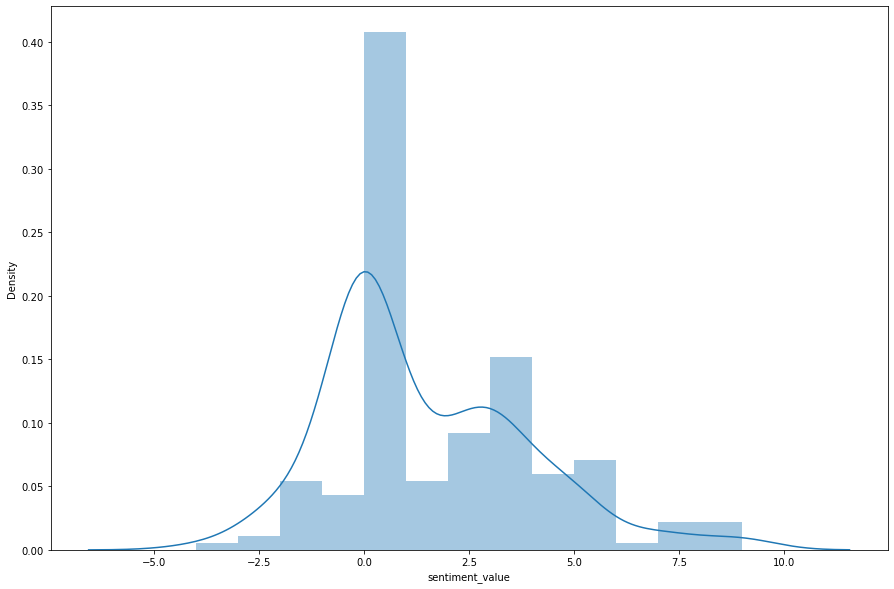

In [51]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

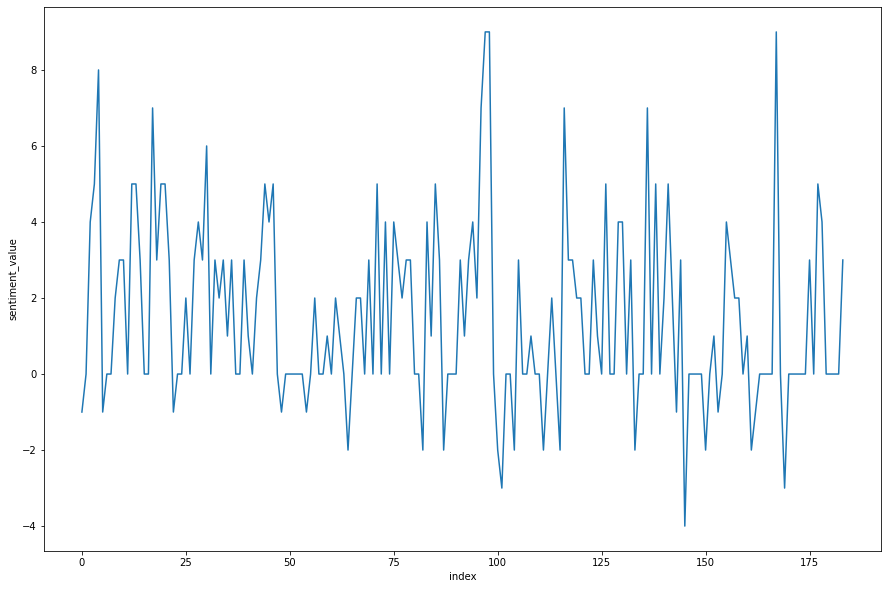

In [52]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)